# Create a multiclass model

După cum spuneam, acuma o să ne ocupăm de parte de clasificare de tipul multiclass. În partea trecută ne-am creat setul de date cu care o să lucrăm. O să ne refacem acest set de date după care o să trecem la partea în care o să ne creem modelul.

In [6]:
# importing the libraries
import torch
from torch import nn

import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
# creating the dataset
# creating the constanst
NUM_SAMPLES = 5000
NUM_FEATURES = 2
NUM_CLASSES = 4
RANDOM_SEED = 42

X, y = make_blobs(n_samples=NUM_SAMPLES, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

In [3]:
# insert the data into a DataFrame
df = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "labels": y
})

df.head()

,X1,X2,labels
0,3.161173,1.546937,1
1,-8.742997,-8.568490,2
2,3.368428,0.995036,1
3,-8.534404,-5.649279,2
4,-9.532127,7.905043,3


<Axes: xlabel='X1', ylabel='X2'>

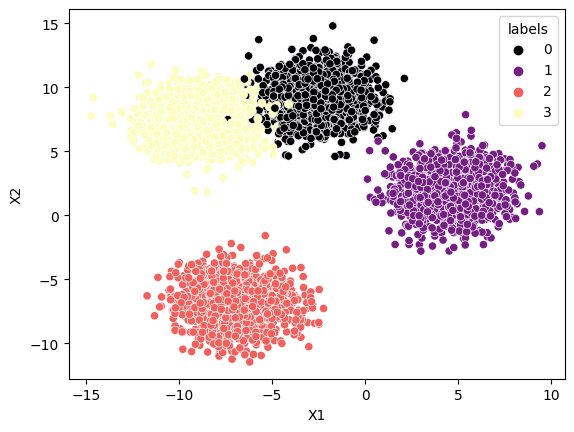

In [7]:
# visualize the data
sns.scatterplot(data=df, x="X1", y="X2", hue="labels", palette="magma")

In [4]:
# transforming the data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [5]:
# split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

Acuma că avem din nou setul de date putem să trecem la partea în care nne creem modelul pentru acest caz separat. Înainte de a crea acest model, să vedem care ar fi diferențele între dintre un model de clasificare binară și un model de multiclasificare.

<img src='../SS/section_03_image_06.png' width=700>

În cadrul tabelului de mai sus se poate observa care sunt diferențele dintre cele două tipuri de modele. Partea de creare de model, de layere și de hidden units din cadrul layerelor este identică ca și pentru un model de clasificare binară. Prima diferență apare la layer-ul de output. În cadrul modelului de calsificare binară se returna o singură valoare care ne spunea din cadrul cărei clase face parte un anumit element. Deoarece existau doar două clase, modelul poate să ne spună din care clasă face parte. În momentul în care avem de-a face cu mai multe clase, atunci este un pic diferit pentru model. Un model de Deep Learning face o predicție asupra cărei clase aparține un anumit element, iar din moment ce sunt mai multe clase, el trebuie să facă o predicție de apartenență la fiecare dintre clasele prezente. Pentru cazul curent, unde avem 4 clase, modelul trebuie să returneze câte o predicție pentru fiecare dintre cele 4 clase, iar predicțiila arată în felul următor:

1. 90% clasa 1

2. 5% clasa 2

3. 2% clasa 3

4. 3% clasa 4

Modelul returnează câte un procent pentru fiecare dintre clasele de mai sus, iar aceste procente însumate trebuie să fie 100. Din aceste valori se alege valoarea cea mai mare, iar această valoare ne spune din ce clasă precize modelul că face parte un anumit element.

Următoarea diferență apare la partea de metodă de activare. Pentru un model de multiclasificare ca și funcție de activare (prin care trecem de la *logits* la *prediction probabilities*) o să ne folosim de `torch.softmax()` (pentru modelul de clasificare binară foloseam **torch.sigmoid()**). Următoare diferență apare la partea de optmizator pentru model. Inițial folosea **Binary Cross Entropy** pentru un model de clasificare binară, dar din moment ce acest model este un de multiclasificare o să ne folosim de optimizatorul `Cross Entropy` (`torch.CrossEntropyLoss`) 

Înaninte de a crea modelul trebuie să ne întrebăm dacă putem să facem separarea între clase folosind un model liniar sau avem nevoie și de layer non-liniare pentru a rezolva problema respectivă. O să creem atât un model care are doar layere liniare, cât și un model care are ambele tipuri de layere. O să începem cu un model cu ambele tipuri de layere.

De data aceasta o să facem o modificare la crearea modelului, și anume o să îi atribuim o serie de parametrii care trebuie specificați modelului în momentul când o să fie creat modelul respectiv. Parametrii respectivi o să reprezinte:

    - numărul de features de intrare în model

    - numărul de features de ieșire din model

    - numărul de hidden unit din fiecare layer de tip liniar

In [8]:
class BlobModel(nn.Module):
    
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()

        self.linear_non_linear_layers_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units*2),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units*2, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    
    def forward(self, x):
        return self.linear_non_linear_layers_stack(x)

Mai sus avem codul prin care creem un model de multiclasificare. Modelul respectiv are nevoie de anumiți parametri atunci când acesta este creat. Ca și parametrii putem să ne folosim de acele constante pe care le-am setat în momentul în care am creat setul de date. În continuare o să ne creem modelul respectiv

In [9]:
model_0 = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8)
model_0

BlobModel(
  (linear_non_linear_layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=4, bias=True)
  )
)

În acest moment avem modelul creat. În următoare lecție o să ne alegem un optimizator și un loss function pentru un astfel de model

## Recapitulare

În cadrul acestei lecții am învățat următoarele:

1. Diferența care apare în momentul creeri unui model de multiclasificare este la partea de layer-ul de output deoarece trebuie să returnăm un număr de date indentic cu numărul total de clase

2. Funcția de activare a layer-ului non-linear pentur un model de multiclasificare este `torch.softmax()`

3. Optimizatorul pentru un model de multiclasificare este `torch.nn.CrossEntropyLoss()`

4. Cum să creem un model cu parametrii în momentul instanțierii modelului
```python
import torch
from torch import nn

class BlobModel(nn.Module):

    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()

        self.stack_layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.stack_layers(x)

model_0 = BolbModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES)
```